機械学習（ニューラルネットワーク）によりアヤメの花の分類を行うプログラム

このプログラムでは，特徴量（花びらの長さと幅）で3クラス（セトサ，ヴァーシカラー，ヴァージニカ）へ分類を行います

In [ ]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Now Learning...
Iteration 1, loss = 1.32937076
Iteration 2, loss = 1.32800644
Iteration 3, loss = 1.32665670
Iteration 4, loss = 1.32532172
Iteration 5, loss = 1.32400161
Iteration 6, loss = 1.32269652
Iteration 7, loss = 1.32140654
Iteration 8, loss = 1.32013177
Iteration 9, loss = 1.31887227
Iteration 10, loss = 1.31762810
Iteration 11, loss = 1.31639930
Iteration 12, loss = 1.31518588
Iteration 13, loss = 1.31398785
Iteration 14, loss = 1.31280518
Iteration 15, loss = 1.31163786
Iteration 16, loss = 1.31048582
Iteration 17, loss = 1.30934901
Iteration 18, loss = 1.30822734
Iteration 19, loss = 1.30712071
Iteration 20, loss = 1.30602903
Iteration 21, loss = 1.30495216
Iteration 22, loss = 1.30388998
Iteration 23, loss = 1.30284234
Iteration 24, loss = 1.30180907
Iteration 25, loss = 1.30079003
Iteration 26, loss = 1.29978502
Iteration 27, loss = 1.29879388
Iteration 28, loss = 1.29781640
Iteration 29, loss = 1.29685240
Iteration 30, loss = 1.29590167
Iteration 31, loss = 1.29496401
I

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


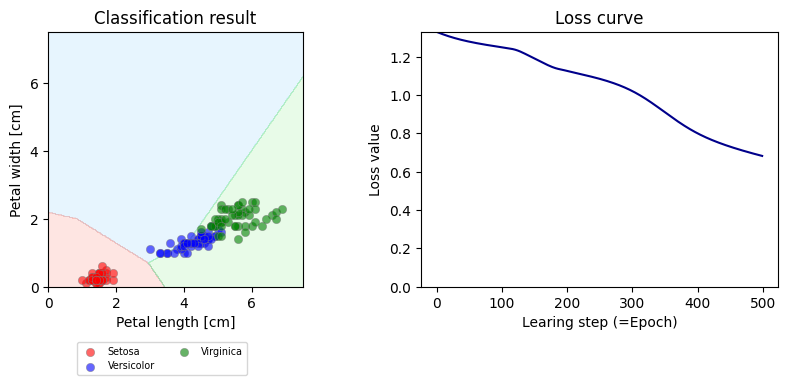

In [ ]:
#　アヤメの分類 2特徴量(petal)で分類: 3クラス

# 学習回数
epochs = 100


# アヤメのデータを読み込み、変数irisに格納
iris = datasets.load_iris()
# 特徴量のセットを変数Xに、ターゲットを変数yに格納
X = iris.data
y = iris.target

# 特徴量をpetalの長さ(length)と幅(width)の
# 2個だけ抽出（2列目と3列目のみ残す）
X = X[:,2:4]


# 分類器：多層ニューラルネットワーク
# hidden_layer_sizes : 中間層数、各中間層ニューロン数
# max_iter : 学習回数上限
# tol : 損失関数の値の変化が10回tol値以下で学習終了
# random_state : 重みの初期値 (1＝ランダム初期値固定、None = ランダム初期値変化）
clf = MLPClassifier(hidden_layer_sizes=(4, ), max_iter=epochs, tol=0, random_state=1, verbose=1)


# ニューラルネットワークの学習
print('Now Learning...')
clf.fit(X, y)


# 分類精度を計算
# 学習データに対する分類結果を取得
result = clf.predict(X)

print('ターゲット（正解）')
print(y)
print('ニューラルネットワークの判定')
print(result)

# データ数をtotalに格納
# len : 配列の長さ取得（2次元配列に対しては行数取得）
total = len(X)
# ターゲット（正解）と予測が一致した数をsuccessに格納
success = sum(result==y)

# 正解率をパーセント表示
print('Accuracy [%]')
print('{:.2f}'.format(100.0*success/total))



# 分類結果を表示

# がく片の長さ(sepal length)と幅(sepal width)の
# 最小値-1と最大値+1
#x_min = (min(X[:,0]) - 1)
#x_max = (max(X[:,0]) + 1)
#y_min = (min(X[:,1]) - 1)
#y_max = (max(X[:,1]) + 1)

# fixed area
x_min = 0
x_max = 7.5
y_min = 0
y_max = 7.5


# グラフ表示エリアを縦横400ずつのグリッドに分割
# (分類クラスに応じて各グリッドの背景に色を塗るため)
# ステップ値にjを付け加えることで個数を指定（x_minからx_maxを400点で分割、x_maxを含む）
X_grid, Y_grid = np.mgrid[x_min:x_max:400j, y_min:y_max:400j]

# グリッドの点をscikit-learn用の入力に並べなおす
# ravel : １次元配列へ変換（行順に結合）
# np.c_ : 配列の結合 　２個の行ベクトルを転置して列方向に並べる
XY_grid = np.c_[X_grid.ravel(), Y_grid.ravel()]

# 各グリッドの点が属するクラス(0～2)をZに格納
Z = clf.predict(XY_grid)

# グリッド上に並べなおす
# reshape : １次元配列を２次元配列へ変換
# shape : 配列の大きさを取得
Z = Z.reshape(X_grid.shape)

# クラス0 (iris setosa)  : Red
# クラス1 (iris versicolor)  : Blue
# クラス2 (iris virginica)  : Green
cmap = ListedColormap(('salmon', 'lightskyblue', 'lightgreen'))

# グラフウインドウ全体の大きさ(縦方向に1枚、横方向に2枚のグラフ表示領域を確保)
fig, axs = plt.subplots(1, 2, figsize=(8.5,4.0), squeeze=False)
# Graph title
axs[0,0].set_title('Classification result')
# 背景の色をクラス領域毎に塗りつぶし
axs[0,0].contourf(X_grid, Y_grid, Z, alpha=0.2, cmap=cmap)
# 軸ラベルを設定
axs[0,0].set_xlabel('Petal length [cm]')
axs[0,0].set_ylabel('Petal width [cm]')
axs[0,0].set_xticks(np.arange(0,8,2))
axs[0,0].set_yticks(np.arange(0,8,2))
# aspect
axs[0,0].set_aspect('equal','box')


# ターゲットを表示(クラスで色分け）
# iris setosa (y=0) のデータのみを取り出す
Xc0 = X[y==0]
# iris versicolor (y=1) のデータのみを取り出す
Xc1 = X[y==1]
# iris virginica (y=2) のデータのみを取り出す
Xc2 = X[y==2]

# iris setosa のデータXc0をプロット
axs[0,0].scatter(Xc0[:,0], Xc0[:,1], c='red', linewidths=0.5, edgecolors='gray', alpha=0.6, label='Setosa')
# iris versicolor のデータXc1をプロット
axs[0,0].scatter(Xc1[:,0], Xc1[:,1], c='blue', linewidths=0.5, edgecolors='gray', alpha=0.6, label='Versicolor')
# iris virginica のデータXc2をプロット
axs[0,0].scatter(Xc2[:,0], Xc2[:,1], c='green', linewidths=0.5, edgecolors='gray', alpha=0.6, label='Virginica')
# legend
axs[0,0].legend(bbox_to_anchor=(0.8,-0.2), ncol=2, fontsize='x-small')


# 2枚目のグラフを設定
# 損失関数の時間変化を描画
axs[0,1].plot(clf.loss_curve_, color='darkblue')
# 損失関数のグラフのtitle, 軸ラベルを設定
axs[0,1].set_title('Loss curve')
axs[0,1].set_xlabel('Learing step (=Epoch)')
axs[0,1].set_ylabel('Loss value')
# グラフ縦軸の範囲　最小値0、最大値をloss_curve_の最大値とする
axs[0,1].set_ylim(0, max(clf.loss_curve_))

# グラフを表示
plt.tight_layout()
plt.show()